<a href="https://colab.research.google.com/github/lifepopkay/Tech-Monies/blob/EDA/1st_data_EDA_for_Final_Data_cleanup_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final script used for cleaning the scrapped dataset from indeed

### Import packages

In [1]:
#import packages needed
import pandas as pd
import numpy as np
import re
import requests as rq

### Get the raw data from onedrive

In [2]:
# data url
url = "https://drive.google.com/u/0/uc?id=1Mx6ilfA0Ffm1s9ff1lgAiUnK8DxAPPBt&export=download"

# get response from the URL
response = rq.get(url)

# write content to excel file
with open("dataset.xlsx", "wb") as file:
    file.write(response.content)

# read data
data = pd.read_excel("dataset.xlsx")

data.head(5)

,title,id,company,location,link,salaryDesc,postDate,JobDesc,title scraped for,Country
0,Senior Software Engineer,job_3e1d31dda6c5cb4b,Offerzen,Lagos,/company/OfferZen/jobs/Senior-Software-Enginee...,Full-time,Just posted,The Opportunity\nOur newly formed Marketplace ...,Data Scientist,Nigeria
1,Data Scientist,job_c3e2ed6ba483528b,GVA Partners,Lagos,/company/GVA-Partners/jobs/Data-Scientist-c3e2...,Permanent +1,Today,Our client requires the skills of a Data Scien...,Data Scientist,Nigeria
2,Full stack developer,job_264deaa0926c095e,Horizonpay Nigeria Limited,Lagos,/company/HorizonPay-Nigeria-Limited/jobs/Full-...,"‚Ç¶700,000 a monthFull-time",Today,\nWork with development teams and product mana...,Data Scientist,Nigeria
3,Superintendent Pharmaceutical Officer,job_4ba7daa713f2751c,NaN,Lagos,/rc/clk?jk=4ba7daa713f2751c&fccid=dd616958bd9d...,Full-time,4 days ago,\n\n\n\nSuperintendent Pharmaceutical Officer\...,Data Scientist,Nigeria
4,Project HSE Advisor I,job_45b19f53adcf0053,Worley,Abeokuta,/rc/clk?jk=45b19f53adcf0053&fccid=d9805af20a6c...,Full-time,5 days ago,\n\n Company : Worley \n \n\nPrimary Location...,Data Scientist,Nigeria


### Extract position

In [3]:
# Creating a list that contains Positions synonymous with "Senior Level"
senior_1 = ['Senior','Lead','Lead/Head/Principle', "Sr", 'Superintendent', "Sr.", "Experienced", "SR", 'Engineer/Senior', 'Senior/Principal', 'Associate/Senior', 'Advanced', 'Snr',
'senior', 'SE', 'Lecturer/Senior', 'Senior/Lead', '(Senior)', '‚ÄãSenior','Senior,', 'Manager/Senior', 'Executive/Senior', 'SENIOR',
'Senior Level']

# Creating a list that contains Positions synonymous with "Mid Level"
midlevel_1 =['Jr', 'Jr.', 'Mid/Sr.', 'JUNIOR', 'Mid', 'JR2231', 'Mid-level', 'Graduate/Junior', 'Junior/Mid-Level',
'[Sessional', 'Intermediate', 'Investments', 'Directeur(rice)']

# Creating a list that contains Positions synonymous with "Mid Level"
midlevel_2= ['mid-level IT Support', 'mid-level Full Stack','mid-level Mobile Developer', 
'mid-level Data Scientist', 'mid-level data engineer', 'mid-level Python Web', 'mid-level mobile Android',
'mid-level UI Developers','mid-level developers where', 
'mid-level role so','mid-level personnel within', 'mid-level Web Designer', 'mid-level (1-3yrs) and',
'mid-level C# developer', 'mid-level Application Engineer', 'mid-level Fullstack Software']


# Creating a list that contains Positions synonymous with "Senior Level"
senior_2 = ['senior with expertise', 'senior web developer','senior technical role.','senior technical level',
 'Senior \nSoftware Engineer',
 'Senior (DSS) will',
 'Senior - Up',
 'Senior - Upto',
 'Senior .NET Developer',
 'Senior .NET Software',
 'Senior .NET developer',
 'Senior .Net Developer',
 'Senior .Net and',
 'Senior / Full',
 'Senior / Product',
 'Senior / Technical',
 'Senior Advisor -',
 'Senior Analyst\n\n\n This',
 'Senior Analyst\n\n\nJob Location:',
 'Senior Analyst\n ',
 'Senior Statistical Analyst',
 'Senior Analyst (FPM',
 'Senior Analyst -',
 'Senior Analyst /',
 'Senior Analyst and',
 'Senior Analyst for',
 'Senior Analyst is',
 'Senior Analyst on',
 'Senior Analyst to',
 'Senior Analyst ‚Äì',
 'Senior Analyst, Finance',
 'Senior Analyst, you',
 'Senior Analyst- Business',
 'Senior Analysts will',
 'Senior Analyst‚Äôs primary',
 'Senior Analytics Consultant...\n',
 'Senior Analytics Engineer',
 'Senior Analytics Engineer.',
 'Senior Applications Engineer',
 'Senior Applied Full',
 'Senior Applied Scientist',
 'Senior Applied Scientist\n',
 'Senior Applied Scientists',
 'Senior Associate \n',
 'Senior Associate -',
 'Senior Associate Cloud',
 'Senior Associate Data',
 'Senior Associate Software',
 'Senior Associate Systems',
 'Senior Associate for',
 'Senior Associate level.',
 'Senior Associate to',
 'Senior Associate, Software',
 'Senior Associate, you',
 'Senior Associate, you‚Äôll',
 'Senior Associate- Software',
 'Senior Associates\nInterviewing client',
 'Senior Automation Test',
 'Senior BI Analyst,',
 'Senior BSA is',
 'Senior Back End',
 'Senior Backend Software',
 'Senior Big Data',
 'Senior BizOps Engineer\n',
 'Senior Business &',
 'Senior Business Analyst',
 'Senior Business Analyst\n',
 'Senior Business Analyst\n\nDo',
 'Senior Business Analyst\nLocation:',
 'Senior Business Analyst\nPrincipal',
 'Senior Business Analyst-',
 'Senior Business Analyst.\n',
 'Senior Business Analyst.\nIn',
 'Senior Business Analysts\n11)',
 'Senior Business Analysts\nDefine,',
 'Senior Business Consultant,',
 'Senior Business Healthcare',
 'Senior Business Intelligence',
 'Senior Business Solution',
 'Senior Business Systems',
 'Senior C# Developer',
 'Senior C# web',
 'Senior C#/WPF Software',
 'Senior Campaign Development',
 'Senior Cheminformatics Data',
 'Senior Cloud App',
 'Senior Cloud Security',
 'Senior Commercial Analyst',
 'Senior Consultant \n',
 'Senior Consultant /',
 'Senior Consultant Consulting',
 'Senior Consultant for',
 'Senior Consultant to',
 'Senior Consultant with',
 'Senior Consultant. You',
 'Senior Consultants Experience',
 'Senior Coordinator, Software',
 'Senior Crime Analyst',
 'Senior Data Scientist\n',
 'Senior Data &',
 'Senior Data Analyst',
 'Senior Data Analyst\n',
 'Senior Data Analyst,',
 'Senior Data Analyst/Scientist',
 'Senior Data Analytics',
 'Senior Data Architect',
 'Senior Data Engineer',
 'Senior Data Engineering',
 'Senior Data Research',
 'Senior Data Science',
 'Senior Data Scientist',
 'Senior Data Scientist\n\n\n',
 'Senior Data Scientist\n\n\n\n\n\n',
 'Senior Data Scientist\n\n067589\n\n\n\n\n\n\n\nSoftware',
 'Senior Data Scientist\nJob',
 'Senior Data Scientist\nLocation:',
 'Senior Data Scientist\nRole',
 'Senior Data Scientist\nWe',
 'Senior Data Scientist,',
 'Senior Data Scientist.\n',
 'Senior Data Scientist/',
 'Senior Data Scientist:\n\nBuilding',
 'Senior Data Scientists',
 'Senior Data Scientists,',
 'Senior Data ScientistÔÇ∑',
 'Senior Data Warehouse',
 'Senior Data science',
 'Senior Deep Learning',
 'Senior DevOps Engineer',
 'Senior DevOps Engineer\n',
 'Senior DevOps Engineer.\nThe',
 'Senior Developer\n\n Location:',
 'Senior Developer\nLocation: Pune\n\n\nAbout',
 'Senior Developer ',
 'Senior Developer (Front',
 'Senior Developer (PHP,',
 'Senior Developer -',
 'Senior Developer APM',
 'Senior Developer and/or',
 'Senior Developer for',
 'Senior Developer has',
 'Senior Developer interested',
 'Senior Developer looking',
 'Senior Developer on',
 'Senior Developer or',
 'Senior Developer plays',
 'Senior Developer to',
 'Senior Developer ‚Äì',
 'Senior Developer, Software',
 'Senior Developer, you',
 'Senior Developer/Lead in',
 'Senior Developers and',
 'Senior Director, Global',
 'Senior Director, Head',
 'Senior Director, Software',
 'Senior Dot Net',
 'Senior Drupal developer,',
 'Senior Engineer\n Job',
 'Senior Engineer\n Quality',
 'Senior Engineer (I7)\n',
 'Senior Engineer -',
 'Senior Engineer on',
 'Senior Engineer using',
 'Senior Engineer who',
 'Senior Engineer will',
 'Senior Engineer with',
 'Senior Engineer ‚Äì',
 'Senior Engineer ‚ÄìC++,',
 'Senior Engineer ‚ÄìDevOps,',
 'Senior Engineer, Engineering',
 'Senior Engineer, you',
 'Senior Engineers and',
 'Senior Engineers, meaning',
 'Senior Executive Officer\n',
 'Senior Executive will',
 'Senior F ull-stack',
 'Senior FP&A Manager',
 'Senior Fellows (or',
 'Senior Finance Data',
 'Senior Finance Manager',
 'Senior Financial Analyst',
 'Senior Financial and',
 'Senior Front End',
 'Senior Front-End Developer',
 'Senior Front-End DeveloperNHS',
 'Senior Front-End Developers',
 'Senior Front-End Engineer',
 'Senior Front-end Developer',
 'Senior Frontend Developer',
 'Senior Frontend Developer\nLuminary',
 'Senior Frontend Developer,',
 'Senior Frontend Engineer',
 'Senior Frontend Engineer.\n',
 'Senior Frontend React',
 'Senior Frontend Software',
 'Senior Full Stack',
 'Senior Full stack',
 'Senior Full-Stack PHP',
 'Senior Full-Stack focused',
 'Senior Fullstack Javascript',
 'Senior Graphics Developer,',
 'Senior HTML Developer',
  'Senior Java Backend',
 'Senior Java Developer',
 'Senior Java Developer\nLocation:',
 'Senior Java Developer,',
 'Senior Java Developers',
 'Senior Java Software',
 'Senior JavaScript Engineers',
 'Senior Knowledge Analysts',
 'Senior Knowledge Manager',
 'Senior Lead Analytics',
 'Senior Lecturer or',
 'Senior Level\nJob Type-',
 'Senior Level -',
 'Senior ML Engineer',
 'Senior ML Engineer.',
 'Senior MLOps Engineers,',
 'Senior Machine Learning',
 'Senior Machine learning',
 'Senior Manager\n\n Education*\n',
 'Senior Manager\nType: Full',
 'Senior Manager \n',
 'Senior Manager &',
 'Senior Manager -',
 'Senior Manager I',
 'Senior Marketing Manager',
 'Senior Manager Information',
 'Senior Manager in',
 'Senior Manager of',
 'Senior Manager will',
 'Senior Manager ‚Äì',
 'Senior Manager, Data',
 'Senior Manager, Delivery',
 'Senior Manager, Development,',
 'Senior Manager, IT',
 'Senior Manager, Machine',
 'Senior Manager, Omnichannel',
 'Senior Manager, Statistical',
 'Senior Managers and',
 'Senior Managers in',
 'Senior Mechanical Engineer',
 'Senior Micro Frontend',
 'Senior Middleware Engineer',
 'Senior Mobility Engineer!!\n\n\n',
 'Senior Operations Analyst',
 'Senior PHP Developer',
 'Senior PHP Developer\n-Strong',
 'Senior PHP DeveloperMinimum',
 'Senior PHP Engineer',
 'Senior PHP Full',
 'Senior PHP/Laravel Developer',
 'Senior Performance Analyst,',
  'Senior Platform Engineer',
 'Senior Postdoctoral Researcher',
 'Senior Principal Engineer',
 'Senior Principal Operations',
 'Senior Principal Software',
 'Senior Principle Data',
 'Senior Product Analyst',
 'Senior Product Designers',
 'Senior Product Manager',
 'Senior Product Manager,',
 'Senior Program officer,',
 'Senior Project Advisor,',
 'Senior Project Manager',
 'Senior Property revenue',
 'Senior Python Developer',
 'Senior QA Analyst',
 'Senior QA;- Work',
 'Senior Quality Assurance',
 'Senior Quality Engineer',
 'Senior Quality Engineer,',
 'Senior Quantitative Associate',
 'Senior RPA Developer',
 'Senior React Engineer.\n',
 'Senior React Js',
 'Senior Reseach Associate',
 'Senior Research Analyst:',
 'Senior Research Engineer.\n\n',
 'Senior Research Fellow',
 'Senior Research Scientist,',
 'Senior Research Software',
 'Senior Resilience Analyst,',
 'Senior Risk Analyst',
 'Senior Risk Data',
 'Senior Risk Manager',
 'Senior Risk Scientists',
 'Senior SDE, Seattle',
 'Senior Sales Analyst',
 'Senior Sales Operations',
 'Senior Scala Engineer\nLocation',
 'Senior Scientist II',
 'Senior Scientist/Expert- HC',
 'Senior Security Risk',
 'Senior Security Specialist,',
 'Senior Snowflake Administrator/Developer\n',
 'Senior Software Developer',
 'Senior Software Developer,',
 'Senior Software Developer-Java',
 'Senior Software Developer.',
 'Senior Software Engineer',
 'Senior Software Engineer\n',
 'Senior Software Engineer\nIn',
 'Senior Software Engineer,',
 'Senior Software Engineer.\nRoot',
 'Senior Software Engineer...\n',
 'Senior Software EngineerJob',
 'Senior Software Engineers',
 'Senior Software Manager',
 'Senior Software Quality',
 'Senior Staff Accountant',
 'Senior Statistical Assistant\n',
 'Senior Statistical Programmer',
 'Senior Statistical Programmer,',
 'Senior Statistician ',
 'Senior System Engineer',
 'Senior System Engineer\n',
 'Senior Systems Developer'
 "senior financial analyst's",
 'Senior Systems Engineer,',
 'Senior Technical Advisor,',
 'Senior Technical Analysts',
 'Senior Technical Writer',
 'Senior Test Software',
 'Senior Testing Specialists',
 'Senior UI Developer',
 'Senior UI Developer\n\n\n\nComing',
 'Senior UI Engineer,',
 'Senior Verification engineer',
 'Senior Video Analyst\n\n\nJob',
 'Senior Web Designer',
 'Senior Web Developer',
 'Senior Web Developer,',
 'Senior Web Engineer',
 'Senior Web and',
 'Senior Web/CSS Developer\nLocation',
 'Senior Wordpress Developer',
 'Senior and Engineer',
 'Senior and Principal',
 'Senior backend developer',
 'Senior business analyst',
 'Senior engineer your',
 'Senior experienced Data',
 'Senior frond end',
 'Senior front-end engineer',
 'Senior level candidates.\nJob',
 'Senior level. If',
 'senior (5+yrs) full',
 'senior AI developer',
 'senior App Developer',
 'senior Data Science',
 'senior Data Scientist',
 'senior Data Scientists',
 'senior Deloitte practitioners',
 'senior DevOps Engineer',
 'senior Engineering lead',
 'senior HR and',
 'senior IT and',
 'senior IT leadership',
 'senior ML Engineer/Scientist',
 'senior Machine Learning',
 'senior NOC engineers',
 'senior Operations Engineers.',
 'senior PHP developer',
 'senior PHP developers.',
 'senior PHP programmer',
 'senior Practice staff',
 'senior Product Managers',
 'senior Risk Executives',
 'senior WordPress Developer,',
 'senior algo developer',
 'senior analyst for',
 'senior analyst level\n\n\n',
 'senior analyst maintains',
 'senior analysts and',
 'senior associate to',
 'senior analysts or',
 'senior analytics consultant,',
 'senior analytics professional',
 'senior and executive',
 'senior and expert',
 'senior and junior',
 'senior and lead',
 'senior and peer',
 'senior and principal',
 'senior architects to',
 'senior backend engineer',
 'senior backend python',
 'senior bankers, client',
 'senior bioinformatician/data scientist',
 'senior business analyst',
 'senior business and',
 'senior customer personnel',
 'senior data analyst',
 'senior data engineer,',
 'senior data professionals',
 'senior data science',
 'senior data scientist',
 'senior data scientists',
 'senior data scientists.',
 'senior data scientists.\nGenerate',
 'senior developer is',
 'senior developer role',
 'senior developer to',
 'senior developer who',
 'senior developer with',
 'senior developer within',
 'senior developer you',
 'senior developers and',
 'senior developers on',
 'senior developers provide',
 'senior developers to',
 'senior developers, who',
 'senior experienced front',
 'senior engineer in',
 'senior engineer you',
 'senior engineer, to',
 'senior engineer, we',
 'senior engineering manager',
 'senior engineering role',
 'senior engineers\n\n\nBS/MS in',
 'senior engineers and',
 'senior engineers change',
 'senior engineers in',
 'senior engineers to',
 'senior engineers, PDMS,',
 'senior engineers, data',
 'senior operations analysts,',
 'senior full stack',
 'senior full-stack developer,',
 'senior full-stack web',
 'senior level Business',
 'senior level Developer',
 'senior level experience',
 'senior level position',
 'senior level position,',
 'senior level positions\nCollect',
 'senior level positions.',
 'senior or junior',
 'senior or lead',
 'senior manager and',
 'senior manager, you',
 'senior managers\n Act',
 'senior managers\nSelf-motivated ‚Äì',
 'senior managers and',
 'senior managers as',
 'senior managers in',
 'senior managers is',
 'senior managers to',
 'senior managers, and',
 'senior managers, designers,',
 'senior managers. Manage',
 'senior marketing, product',
'senior software architect',
 'senior software developer',
 'senior software developer.',
 'senior software developers',
 'senior software development',
 'senior software engineer',
 'senior software engineer,',
 'senior software engineering',
 'senior software or','senior role within',
 'senior role, you',
 'senior role.\n\n\n\n\n\n\n\n ',
 'senior roles and',
 'senior roles in',
 'senior roles)\n \n\n\n\n',
 'senior roles, leadership',
 'senior roles.\n*You will',
 'senior scientific staff',
 'senior scientist will',
 'senior scientist, AI',
 'senior scientists, principal','senior risk analysts',
 'senior risk managers',
 'senior role architecting',
 'senior role in', 'senior program manager',
 'senior program managers','senior product manager,',]

# Creating a list that contains Positions synonymous with "Mid Level"
midlevel_3 = ['junior technology staff.','junior technical staff.\n', 'junior scientists to', 'junior personnel within',
  'Junior NLP Engineer',
 'Junior .NET Engineer',
 'Junior .Net Developer',
 'Junior Analyst along',
 "Junior Analyst's responsibilities",
 'Junior Analyst. The',
 'Junior Analytics Consultants',
 'Junior Angular Developer',
 'Junior Business Analyst\nLocation:',
 'Junior C++ Software',
 'Junior Data Engineer',
 'Junior Data Science',
 'Junior Data Scientist',
 'Junior Data Scientist.',
 'Junior Data Scientist/Analyst.',
 'Junior Data Scientists',
 'Junior Data Scientists',
 'Junior Developer\n\n\n\nJob Summary:',
 'Junior Developer\nContracting Authority:',
 'Junior Developer\nRole: Junior',
 'Junior Developer \n',
 'Junior Developer looking',
 'Junior Developer to',
 'Junior Developer who',
 'Junior Developer, Dynamics',
 'Junior Developers\n\n\n Preferred',
 'Junior Developers in',
 'Junior Developers on',
 'Junior Developers.\n \nSenior',
 'Junior Developers.\n Design',
 'Junior Front end',
 'Junior Full Stack',
 'Junior ML Engineer',
 'Junior PHP Developer',
 'Junior PHP developer',
 'Junior Research Fellow',
 'Junior Robotics Software',
 'Junior SCADA Developer‚Äôs',
 'Junior developers\n Take',
 'Junior Software Developer',
 'Junior Software Developers,',
 'Junior Software Engineer',
 'Junior Software Engineer:',
 'Junior Visual Designers',
 'Junior Web &',
 'Junior Web Designer.',
 'Junior Web Developer',
 'Junior developers during',
 'Junior developers who',
 'junior AI researchers',
 'junior Analysts\nProvide updates',
 'junior BI engineers,',
 'junior DS, participate',
 'junior Data Analysts\n\n\n\n',
 'junior Data Engineer',
 'junior Data Scientist',
 'junior Data Scientists',
 'junior Data Scientists.',
 'junior DevOps engineers\n',
 'junior Developer with',
 'junior Engineers in',
 'junior Engineers.\n ',
 'junior Front-End Developer',
'junior IT Business',
 'junior ML Engineers',
 'junior MLEs in',
 'junior QA engineers',
 'junior Quality Engineers',
 'junior SRE\n\n QUALIFICATIONS',
 'junior analysts\n Ensure',
 'junior analysts\n Interest',
 'junior analysts\nFinancial Acumen',
 'junior analysts that',
 'junior analysts to',
 'junior analysts with',
 'junior analysts, ideally',
 'junior analysts.\n\n Technical\n\n',
 'junior analysts.\n\nYour future',
 'junior analysts.\n Assess',
 'junior analysts. In',
 'junior analysts. Responsibilities',
 'junior analysts. We',
 'junior analysts..\nWe are',
 'junior analysts/data scientists',
 'junior analysts?\nDo you',
 'junior analytics team',
 'junior and aspiring',
 'junior and entry',
 'junior and entry',
 'junior and experienced',
 'junior and mid-level',
 'junior and middle',
 'junior and new',
 'junior architects\n\n\n 5.\n',
 "junior associates\n\n\n\n\n\nRequired Experience\n\nBachelor's",
 'junior associates\n\n\n\n\n\nRequired Experience\n\nCollege',
 'junior associates\nDevelop innovative',
 'junior associates on',
 'junior cadets joining',
 'junior level associates.',
 'junior consultants. The',
 'junior data analysts',
 'junior data analysts.By',
 'junior data engineer\n',
 'junior data engineering',
 'junior developers\n\nYou should',
 'junior data engineers.\n\n\n\n\nIndustry',
 'junior data professionals',
 'junior data science',
 'junior data scientist',
 'junior data scientists',
 'junior data scientists,',
 'junior data scientists.\n\n',
 'junior data scientists.\n\n\n',
 'junior data scientists.\n\nIn',
 'junior developer. On',
 'junior developers\n\n\n Skills',
 'junior developers\n\n REQUIREMENTS:',
 'junior developers\n\nJob Type:',
 'junior developers\nAbility to',
 'junior developers\nExceptional understanding',
 'junior developers\nFamiliar with',
 'junior developers and',
 'junior developers in',
 'junior developers on',
 'junior developers to',
 'junior developers within',
 'junior developers, lead',
 'junior developers, or',
 'junior developers, providing',
 'junior developers.\n\n\n\nOur Ideal',
 'junior developers.\n\n We',
 'junior developers.\n \nWhere',
 'junior developers.\n Provides',
 'junior developers.\nDemonstrate expertise',
 'junior developers.\nExperience building',
 'junior developers.\nTeam oriented',
 'junior developers. In',
 'junior developers. Setup',
 'junior developers. You',
 'junior developers; collaborate',
 'junior developers‚Äô work\n\n\nDocument',
 'junior doctor‚Äôs contract',
 'junior employees, and',
 'junior engineers\n Write',
 'junior engineers \n\n\nYou‚Äôll',
 'junior engineers Develop',
 'junior engineers and',
 'junior engineers get',
 'junior engineers grow.',
 'junior engineers in',
 'junior engineers on',
 'junior engineers to',
 'junior engineers working',
 'junior engineers, avoids',
 'junior engineers, data',
 'junior engineers, including'
 'junior engineers, is',
 'junior engineers, reviewing',
 'junior engineers.\n Work',
 'junior engineers.\n- Participate',
 'junior engineers. A',
 "junior engineers. They're",
 'junior engineers. We',
 'junior financial analyst.\n\n',
 'junior frontend teams',
 'junior level associates.',
 'junior level developers',
 'junior level developers',
 'junior level employee',
 'junior level employees',
 'junior levels.\n\n\n\nAbility to',
 'junior professionals. Works',
 'junior professionals; Strong',
 'junior programmers and',
 'junior programmers.\nAnalysis, estimating',
 'junior programming staff',
 'junior researchers to',
 'junior scientists\n Troubleshoot',
 'junior scientists to',
 'junior software developers.',
 'junior software developers.\n\n\n',
 'junior software development',
 'junior software engineer',
 'junior software engineers',
 'junior software engineers\n\n\n',
 'junior software engineers\n\nRequired',
 'junior staff\nStrong personal',
 'junior staff and',
 'junior staff as',
 'junior staff instilling',
 'junior staff on',
 'junior staff or',
 'junior staff through',
 'junior staff to',
 'junior staff who',
 'junior staff.\n\n\n\n Required',
 'junior staff.\n\n\n \nNice',
 'junior staff.\n\n\n Let‚Äôs',
 'junior staff.\n Allocating',
 'junior staff.\nAllocate resources',
 'junior staff.\nAllocating resources',]

# Creating a list that contains Positions synonymous with "Entry Level"
entrylevel_1 = ['entry to mid','entry level Data',
 'entry level analyst',
 'entry level employees\n',
 'entry level java',
 'entry level job',
 'entry level mobile',
 'entry level position.\nResponsibilities:\n\nCollaborate',
 'entry level professional.',
 'entry level programmer',
 'entry level role,',
 'entry level specialist',
 'entry level to',
 'entry level, hiring',
 'entry level.\n\n\n\n JOB','entry level Data',
 'Entry level\n Austin,',
 'Entry level position',
 'Entry level professional',
 'Entry level professionals',
 'Entry level. Data',
 'Entry Level\n\n\n\n Are',
 'Entry Level\nAbout the',
 'Entry Level\nJob Posting',
 'Entry Level\nStellenanzeige 26.07.2022,',
 'Entry Level \n',
 'Entry Level \nJob',
 'Entry Level Business',
 'Entry Level Salary:',
 'Entry Level Schedule:',
 'Entry Level Software',]


In [4]:
def State_Age_Position(df):
    data = df.copy()
    # Fill missing values for location with "Unspecified"
    data.location.fillna("Unspecified", inplace = True)

    # Extracting the state from the location assuming the state is the first word before a comma
    data["State"] = [x[0] for x in data.location.str.split(",") if type(x) is list]
    # Fill missing values for JobDesc with "Unspecified"
    data["JobDesc"].fillna("Unspecified", inplace = True)
    
    def get_age(job):
        return np.nan

    # Creates a columns "age" filled with missing vslues
    data["age"] = data.JobDesc.apply(get_age)
    age_column_index = data.shape[1] - 1
    # Creating a list thst stores the extracted "age" related parts of the job description
    asdf = []
    i = 0
    for x in data.JobDesc:
        y = x.split(" ")
        if "Age" in y:
            position =  y.index("Age")
            asdf.append((i, " ".join(y[position: position + 4])))
        elif "age" in y:
            position =  y.index("age")
            asdf.append((i, " ".join(y[position: position + 4])))
        i += 1


    asdf
    asdf2 = []
    for i in range(len(asdf)):
        asdf2.append((i, asdf[i]))

    # filtering out valid age relatted parts of the job description
    asdf_index = [1, 38, 42, 49, 51, 55, 63, 64, 65, 67, 68, 71, 76, 79, 82, 85]
    asdf3 = []
    for i in range(len(asdf)):
        if i in asdf_index:
            asdf3.append(asdf[i])

    # Filling age for jobs that have "valid age related" parts in the job description
    for i in asdf3:
        data.iloc[i[0],11] = i[1]

    # Cleaning the Age columns
    data.age.replace('age (40 and over),', "40 or older", inplace = True)
    data.age.replace('age (40 or older),', "40 or older", inplace = True)
    data.age.replace('Age Limit\n\n\n Minimum:\n 25', "25 or older", inplace = True)
    data.age.replace('age of 35 years\n\nFunctional', "35 or younger", inplace = True)

    MidLevel_synonyms = ["mid-level","Mid-Level","Mid-level","Mid level","Mid level","mid level"]
    SeniorLevel_synonyms = ["Senior", "senior"]
    EntryLevel_synonymns = ["Entry","entry"]
    MidLevel_synonyms_2 = ["Junior", "junior"]
    
    # Creating a column "Position" that contains the first word of the "title"
    data["Position"] = [x[0] for x in data.title.str.split(" ") if type(x) is list]
    Position_column_index = data.shape[1]-1
    # Replacing Positions synonymous with "Senior Level" with "Senior Level"
    for x in senior_1:
        data["Position"].replace(x, "Senior Level", inplace = True)

    # Replacing Positions synonymous with "Mid Level" with "Mid-Level"
    for x in midlevel_1:
        data["Position"].replace(x, "Mid-Level", inplace = True)

    # creating a list that contains index with Positions that are neither "Senior Level" or "Mid-Level"    
    Invalidposition = list(data.query("Position != 'Senior Level' and Position != 'Mid-Level'").index)

    # Filling positions that are neither "Senior Level" or "Mid-Level" with np.nan
    for invalidposition in Invalidposition:
            data.iloc[invalidposition,Position_column_index] = np.nan

    def Position(Synonymous_Positions, position, index_of_Position_column):
        # Replacing Positions synonymous with "Senior Level" with "Senior Level"
        for x in Synonymous_Positions:
            data["Position"].replace(x, position, inplace = True)

        # creating a list that contains index with Positions that are neither "Senior Level" or "Mid-Level" or "Entry Level"
        Invalidpositions = list(data.query("Position != 'Senior Level' and Position != 'Mid-Level' and Position != 'Entry Level' ").index)

        # Filling positions that are neither "Senior Level" nor "Mid-Level"  nor "Entry Level" with np.nan
        for invalidposition in Invalidpositions:
                data.iloc[invalidposition,index_of_Position_column] = np.nan

    #Filling Missing Positions for jobs with "Mid Level" related extracts from the job description
    def search_and_fill_position(list_of_position, index_of_Position_column):
        for position_synonym in list_of_position:
            i = 0
            for x in data.JobDesc:
                y = x.split(" ")
                if position_synonym in y:
                    index_ =  y.index(position_synonym)
                    if data.iloc[i,index_of_Position_column] is np.nan:
                        data.iloc[i,index_of_Position_column] = (" ".join(y[index_: index_ + 3]))
                i+=1
    
    search_and_fill_position(MidLevel_synonyms, Position_column_index)
    Position(midlevel_2, "Mid-Level", Position_column_index)

    search_and_fill_position(MidLevel_synonyms_2, Position_column_index)
    Position(midlevel_3, "Mid-Level", Position_column_index)

    search_and_fill_position(SeniorLevel_synonyms, Position_column_index)
    Position(senior_2, "Senior Level", Position_column_index)

    search_and_fill_position(EntryLevel_synonymns, Position_column_index)
    Position(entrylevel_1, "Entry Level", Position_column_index)
    
    return data

data = State_Age_Position(data)

data.head(4)

,title,id,company,location,link,salaryDesc,postDate,JobDesc,title scraped for,Country,State,age,Position
0,Senior Software Engineer,job_3e1d31dda6c5cb4b,Offerzen,Lagos,/company/OfferZen/jobs/Senior-Software-Enginee...,Full-time,Just posted,The Opportunity\nOur newly formed Marketplace ...,Data Scientist,Nigeria,Lagos,NaN,Senior Level
1,Data Scientist,job_c3e2ed6ba483528b,GVA Partners,Lagos,/company/GVA-Partners/jobs/Data-Scientist-c3e2...,Permanent +1,Today,Our client requires the skills of a Data Scien...,Data Scientist,Nigeria,Lagos,NaN,NaN
2,Full stack developer,job_264deaa0926c095e,Horizonpay Nigeria Limited,Lagos,/company/HorizonPay-Nigeria-Limited/jobs/Full-...,"‚Ç¶700,000 a monthFull-time",Today,\nWork with development teams and product mana...,Data Scientist,Nigeria,Lagos,NaN,NaN
3,Superintendent Pharmaceutical Officer,job_4ba7daa713f2751c,NaN,Lagos,/rc/clk?jk=4ba7daa713f2751c&fccid=dd616958bd9d...,Full-time,4 days ago,\n\n\n\nSuperintendent Pharmaceutical Officer\...,Data Scientist,Nigeria,Lagos,NaN,Senior Level


### Salary and pay frequency Extraction
Extraction functions for pay frequency, and salary into upper & lower range columns

In [5]:
# functions 
def upper_salary_range(x):
    
    """
    This function extracts the upper salary range from the scrapped salary description and returns the upper salary.
    
    arg :
        x : the salary description scrapped (str)
    
    return:
        upper_salary_value : cleaned upper salary value (int)
    """
    
    scrapped_salary = str(x).split()
    upper_salary_value = ''
    lower_salary_value = ''
    trackposition = 0
    digit = ['0','1','2','3','4','5','6','7','8','9']
    
    for item in scrapped_salary:
        text_check = False
        #checking if the item in the list is possibliy salary( confirming if the 3 item is a number)
       
        
        try:
            text_check1= item[1]
            if text_check1 in digit and item[0] != '+':
                text_check = True
            else:
                try:
                    text_check2 = item[2]
                    if text_check2 in digit and item[0] != '+':
                        text_check = True
                    else:
                        try:
                            text_check3= item[3]
                            if text_check3 in digit and item[0] != '+':
                                text_check = True
                        except:
                            text_check = False
                except:
                    text_check = False
        except:
            text_check = False
            
            
        if trackposition == 0 and text_check == True:
            #lower_salary_value = t
             #remove leading letters from salary
            if item[0] in digit:
                lower_salary_value = item
            elif item[1] in digit:
                lower_salary_value = item[1:]
            elif item[2] in digit:
                lower_salary_value = item[2:]
            elif item[3] in digit:
                lower_salary_value = item[3:]
            
            # change tracker to shower lower_range is picked
            trackposition = 1    
            
            # find lower_salary_value range with upper_salary_value mergered togther
            for i in lower_salary_value:
                if i != ',' and i.lower() != 'k'and i != '.' and i not in digit:
                    ind = lower_salary_value.index(i)
                    upper_salary_value = lower_salary_value[ind:]
                    lower_salary_value = ''
                    
                    #clean currency from upper_salary_value
                    if upper_salary_value[0] in digit:
                        upper_salary_value = upper_salary_value
                    elif upper_salary_value[1] in digit:
                        upper_salary_value = upper_salary_value[1:]
                    elif upper_salary_value[2] in digit:
                        upper_salary_value = upper_salary_value[2:]
                    elif upper_salary_value[3] in digit:
                        upper_salary_value = upper_salary_value[3:]
                    elif upper_salary_value[4] in digit:
                        upper_salary_value = upper_salary_value[4:]
                    elif upper_salary_value[5] in digit:
                        upper_salary_value = upper_salary_value[5:]
                    
                    trackposition = 0  # toggle back tracker as upper has been picked
                    #exit the loop
                    break
                
            
        elif trackposition == 1 and text_check == True:
            if item[0] in digit and lower_salary_value != '':
                upper_salary_value = item
            elif item[1] in digit and lower_salary_value != '':
                upper_salary_value = item[1:]
            elif item[2] in digit and lower_salary_value != '':
                upper_salary_value = item[2:]
            elif item[3] in digit and lower_salary_value != '':
                upper_salary_value = item[3:]
                
                
     # replace ',' with '' 
    upper_salary_value = upper_salary_value.replace(',', '')
    
    #replace 'k' with '000'
    upper_salary_value = upper_salary_value.upper()
    if upper_salary_value[-1:] == 'K':
        upper_salary_value = upper_salary_value.replace('K', '')
        upper_salary_value = float(upper_salary_value)*1000
    
    #convert to int
    try:
        upper_salary_value = float(upper_salary_value)
    except:
        upper_salary_value = np.nan
    
    
    return upper_salary_value


def lower_salary_range(x):
        
    """
    This function extracts the lower salary range from the scrapped salary description and returns the lower salary.
    
    arg :
        x : the salary description scrapped (str)
    
    return:
        lower_salary_value : cleaned upper salary value (int)
    """
    scrapped_salary = str(x).split()   #split the salary description
    upper_salary_value = ''     #variable for holder upper salary range
    lower_salary_value = ''     #variable for holder lower salary range
    trackposition = 0        #variable for tracking when lower salary has been extracted 

    digit = ['0','1','2','3','4','5','6','7','8','9']  # number listing
    
    #looping through the description for the extraction 
    for item in scrapped_salary:
        text_check = False
        #checking if the item in the list is possibliy salary( confirming if the 3 item is a number)
       
        
        try:
            text_check1= item[1]
            if text_check1 in digit and item[0] != '+':
                text_check = True
            else:
                try:
                    text_check2 = item[2]
                    if text_check2 in digit and item[0] != '+':
                        text_check = True
                    else:
                        try:
                            text_check3= item[3]
                            if text_check3 in digit and item[0] != '+':
                                text_check = True
                        except:
                            text_check = False
                except:
                    text_check = False
        except:
            text_check = False
            
        
            
        
        #extraction based on tracker
        if trackposition == 0 and text_check == True:
            #remove leading letters from salary
            if item[0] in digit:
                lower_salary_value = item
            elif item[1] in digit:
                lower_salary_value = item[1:]
            elif item[2] in digit:
                lower_salary_value = item[2:]
            elif item[3] in digit:
                lower_salary_value = item[3:]
                
             # find lower range with upper mergered togther
            for i in lower_salary_value:
                if i != ',' and i.lower() != 'k' and i != '.'and i not in digit:
                    ind = lower_salary_value.index(i)
                    lower_salary_value = lower_salary_value[:ind]
                    upper_salary_value = lower_salary_value[ind:]
                    break
            
            #Update tracker 
            trackposition = 1
            
        elif trackposition == 1 and text_check == True:
            upper_salary_value = item
    
    # replace ',' with '' 
    lower_salary_value = lower_salary_value.replace(',', '')
    
    #and 'k' with '000'
    lower_salary_value = lower_salary_value.upper()
    if lower_salary_value[-1:] == 'K':
        lower_salary_value = lower_salary_value.replace('K', '')
        lower_salary_value = float(lower_salary_value)*1000
    
    #convert to int
    try:
        lower_salary_value = float(lower_salary_value)
    except:
        lower_salary_value = np.nan
        
    return lower_salary_value


def pay_freq(x):  
    """
    This function extracts the payment frequency from the scrapped salary description.
    
    arg :
        x : the salary description scrapped (str)
    
    return:
        results : payment frequency (str)
    """
    text = str(x).split()
    month_re = r'month\w*'
    year_re = r'year\w*'
    hour_re = r'hour\w*'

    results = None

    for t in text:
        month_finder = re.findall(month_re, t.lower())
        year_finder = re.findall(year_re, t.lower())
        hour_finder = re.findall(hour_re, t.lower())
        if len(year_finder) > 0:
            results = 'Yearly'
            break
        elif len(month_finder) > 0:
            results = 'Monthly'
            break
        elif len(hour_finder) > 0:
            results = 'Hourly'
    return results


#create and extract the upper and lower salary range for each row
data['upper_salary'] = data['salaryDesc'].apply(lambda x: upper_salary_range(x))
data['lower_salary'] = data['salaryDesc'].apply(lambda x: lower_salary_range(x))
data['payment_frequency'] = data['salaryDesc'].apply(lambda x: pay_freq(x))


data[['upper_salary', 'lower_salary','payment_frequency']].sample(20)

,upper_salary,lower_salary,payment_frequency
2781,NaN,NaN,None
2393,NaN,NaN,None
7209,NaN,NaN,None
7818,NaN,NaN,None
7493,NaN,100000.0,Yearly
7495,NaN,NaN,None
4110,NaN,NaN,None
2749,NaN,NaN,None
8552,NaN,NaN,None
5403,94700.0,74700.0,Yearly


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8700 non-null   object 
 1   id                 8675 non-null   object 
 2   company            8574 non-null   object 
 3   location           8700 non-null   object 
 4   link               8675 non-null   object 
 5   salaryDesc         6589 non-null   object 
 6   postDate           8675 non-null   object 
 7   JobDesc            8700 non-null   object 
 8   title scraped for  8700 non-null   object 
 9   Country            8700 non-null   object 
 10  State              8700 non-null   object 
 11  age                16 non-null     object 
 12  Position           2470 non-null   object 
 13  upper_salary       2397 non-null   float64
 14  lower_salary       2833 non-null   float64
 15  payment_frequency  2808 non-null   object 
dtypes: float64(2), object(14

### Years of Experience Extraction
Extraction of years of experience 

In [7]:
def years_exp(x):
  global result
  expression = "\d*\+?\s+(?=year)"
  matches=re.search(expression,str(x))
  if matches:
    result = matches.group(0)
  else:
      None
  
  #remove the '+' on some of the years of experience
  try:
    if result.split()[-1][-1] == '+':
      result = result.split()[-1].replace('+', '')
  except:
    result = result

  
  #convert to integer
  try:
    result = int(result)
  except:
    result = np.nan

  return result
  

data['year_of_exp'] = data['JobDesc'].apply(lambda x: years_exp(x))

data[['year_of_exp']].sample(10)

,year_of_exp
1626,5.0
5890,NaN
4068,7.0
6533,5.0
1702,7.0
2765,4.0
6460,5.0
6069,5.0
1081,NaN
5693,NaN


### Contract Type Extraction
Extraction of the Contract Type

In [8]:
def contract_type(x):  
    
    """
    This function extracts the contract type from the scrapped job salary description.
    
    arg :
        x : the job description scrapped (str)
    
    return:
        results : contract type (str)
    """
    
    #find 'Type:' index location
    try:
        pos = str(x).split().index('Type:')
        
        #get a list of all text after "Type:"
        text = str(x)[pos+1 : ].split()
    except:
        text = []
    
    
    
    full_time_re = r'full-time\w*'
    contract_re = r'contract\w*'

    results = None

    for t in text:
        full_time_finder = re.findall(full_time_re, t.lower())
        contract_finder = re.findall(contract_re, t.lower())
        #hour_finder = re.findall(hour_re, t.lower())
        if len(full_time_finder) > 0:
            results = 'Full-time'
        elif len(contract_finder) > 0:
            results = 'Contract'

    return results


#extract the contract type for each row
data['contract_type'] = data['JobDesc'].apply(lambda x: contract_type(x))

data[['contract_type']].sample(10)

,contract_type
472,None
2702,None
5409,None
6043,None
1175,None
7644,None
5838,None
4004,Full-time
2603,None
2741,None


### Clean title, Extract skills and eligibility
Clean title & extract skills & eligibility from jobDesc

In [9]:
def clean_data(df1):
  '''
  add new columns --> eligibilty, title_cleaned & skills_list
  takes dataframe as input & output dataframe
  '''

  # additional functions
  def replace_jd_keywords(text):
      for k,v in skillPat.items():
          text = re.sub(k, v, str(text),flags=re.I)
      return text
          
  def split_jd(text, key):
      tmp = []
      for i in text.split('!!!'):
          if i.startswith('['+key+']'):
              txt = re.sub('^\['+key+'\][ :,;]{0,5}','', i).strip().replace('\n',' ')
              tmp.append(txt) if len(txt)>0 else None
      
      if (key=='Requirements') & (len(tmp) == 0):
          tmp.append('[NO REQ]')
          for i in text.split('!!!'):
              if (not i.startswith('[')) & len(i.strip())>0:
                  tmp.append(i.strip().replace('\n',' '))
          
      return '| '.join(tmp)

  def search_skills(text):
    skillList = list()
    for skill in allSkills:
      if text.find(skill) != -1:
        skillList.append(skill)
    return list(set(skillList))

  # create patterns for eligibility
  eliPat = r'\n*(HS|HSD|High School Diploma|MBA|BS|MS|[Pp]h\.+[dD]\.+|[bB]achelor|[mM]aster|[uU]ndergraduate|B\.Sc\.).*[\.\n]{1}'
  replace_EP = {
      'undergraduate|bs|bachelor|b.sc.': 'undergraduate',
      'ph.d.|phd': 'doctorate',
      'mba|msc|ms|master': 'postgraduate',
      'HSD|High School Diploma': 'high school'
  }

  # titles
  titPat = {
          '[dD]ot\w?[nN]et': ".Net", # if contains Dot Net, Dotnet, etc. --> .Net
          '[Ss]r\.?': 'Senior', # Replace with Senior
          '[Jj]r\.?': 'Junior', # Replace with Junior
          'Financial Advisory International |USARPC ': '', # remove company name
        # Garbage value cleanups
          '\([\w\d ,\-]*\)|URGENT|\!|\-\-|\-$|\u200b|\– part':'',
          '\|.*':'', # remove everything after "|"
          ' for .*| in .*| at .*':'', # remove everything after "for" # remove everything after "for", "in", "at"
          '[Rr]emote': '', # remove remote
          ' , .*':'', # remove everything after comma
          '\[.*\]':'', # remove everything within brackets
          '\s[Jj]ob.*$':'', # remove everything after job word
          '_|\-|#.*|\(.*\)?':' ', #remove underscores & dash
          ' Pune.*$| Mumbai.*$| Hyd.*$| New Delhi.*$| Bangalore.*$': '', # remove places
          ' Marketing Measure.*$|¬£.*$| ‚Ä.*$|, New.*$| year.*$| \d+.*$| :.*$| \w+\d+.*$': '', # remove from end
          '^.*Hub |^.*\: ': '', # remove from start
        }
  
  # skill block
  skillPat = {
        'the role[ ]?[\n\:·]|your role[ ]?[\n\:·]|Job Scope|trust you to|What You[\'Äô]ll Do|Job Highlight|Summary|Responsibilities[\n\:·]|Responsible for|What to expect|Job Description|you will work': "!!![Role]",
        'need to have|What You Have|you must have|You have[ ]?[\n\:·]|Your expertise|Requirement[s]?[ ]?[\n\:·]|Requirements(?! )|Job Requirement|Desired Competencies|What we seek|Who You Are|What you\'ll need|About you|Qualifications': "!!![Requirements]", 
        'What You\'ll Enjoy|Benefits|What we offer|we will offer': "!!![Benefits]", 
        'Apply if|Apply Now|Please send|Please contact|Please Provide|Join Us|Closing Statement|Application Method|is one of the leading|about us':"!!![End]"
      }

  # skills
  allSkills = ['.NET','.net','3d','3rd party Ad serving platforms','A/B Testing','A/B testing','ABAP','ADO.NET','AI Programming',
             'ALGOL','APL','ASCII Encoding','ASP / ASP.NET','ATL','AWS','Action Oriented','ActionScript','Ad Campaign Management',
             'Ad Placement','Ada','Adhoc Analysis','Adhoc copy-writing','Advanced Excel','Adwords','Algebra','Algorithms','Alice',
             'Analytical Skills','Articulation','Assembly Language','Assembly and product QA activities','Awk','B2B Sales','BA',
             'BBC Basic','BTL','Backbone.js','Bagging','Balancing Short term and long term solutions','Balsamiq','Bias for action',
             'Books','Brand Collaboration','Brand Management','Build Customer Insights','Build MVP or POC','Business Mindset',
             'Business Plan','Business insights','C','C#','C++','CGI','COBOL','CORBA','CSS','CVS','CakePHP','Calculus','Campaign Management',
             'Career development of juniors','Cascading Style Sheets','Chat-bots','Clevertap','Client Management','Clustering','Cocoa',
             'CodeIgniter','Collaboration with Designers','Collaboration with data scientists','Collaboration with designers',
             'Collaboration with developer','Collateral Branding','Communication Skills','Communication Strategy','Community Building',
             'Community Development','Competitor research','Computer Knowledge','Computer Vision','Consultative Sales','Consumer research',
             'Consumer segmentation','Container technologies','Content Marketing','Content Operations','Cookies','Coordination Skills',
             'Creative','Crimson Hexagon','Critical Thinking','Cross-functional ','Customer Focused','Customer Relationship management',
             'Customer Training','D','D3.js','DOM','Dash','Dashboards','Data Analysis','Data Architecture','Data Assets','Data Automation',
             'Data Driven','Data Modeling','Data Reporting','Data Visualization','Data Warehousing','Data driven','Data engineering',
             'Data mining','Databases','Deal with ambiguity','Decision Trees','Deep Learning','Delphi','Demand Forecasting',
             'Demand Planning','Detail-Oriented','DevOps','Digital marketing','DigitalOcean','Dimensionality reduction','Direct Sales',
             'Distributed Computing','Django','Docker','Documentation','Dreamweaver','ERP System','ETL','Email Marketing','Ensemble Modeling',
             'Entity Recognition','Entrepreneurial mind-set','Entrepreneurship mentality','Erlang and Elixir','Event collaboration','Excel',
             'Execute marketing campaigns','Experience with Technology/Software','Experienced with High Volume/Production Environment',
             'Express.js','Extreme Programming','F#','FFmpeg','FORTH','FORTRAN','Facebook Insights','Familiar with Hubspot','Fan building',
             'FastAPI','First principle thinking','Flask','Flexible','Fraud Detection','Functional Programming','GATE','GNUstep',
             'General_Awareness','Geospatial Data','Git','Go','Google Ad-word Campaign','Google Analytics','Gradient Boosting algorithm',
             'Gradient Descent','Growth Strategy','Gurobi','HDFS','HTML','Hadoop','Handling Large Amounts of Data','Hands on work experience',
             'Haskell','Header Bidding','High Budget Campaigns','High ROI on campaigns','Hive','Hypothesis testing','IDL','INTERCAL','IOT',
             'ITIL','Image Analytics','ImageMagick','InVision','Increase Brand Awareness','Indentify growth potential','Industry knowledge',
             'Influencer Marketing','Initiative','Institutional Sales','Integrity and Trust','Interpersonal Skills','Inventory Management',
             'JSON','Java','Javascript','KNN','Keras','Knowledge of Agile process and principles','Knowledge of Technology ',
             'Knowledge of Web Applications','Knowledge of ticketing tools','LabVIEW','Laravel','Lavarel','Lead Generation',
             'Leadership','Lean manufacturing processes','Lidar','Linear algebra','Linked Lists','Lisp','List of Programming Tools and Libraries',
             'Logistics Management','Logo','Loyalty program','MDN','ML','MPI','MS Access','MS Excel','MS Office','MS Word','MSXML','Machine Learning',
             'Manage platform operations','Manage warehouse activities','Managing Marketing Databases','Managing Product Backlogs',
             'Managing and measuring work ','MantisBT','Market Research','Marketing','Marketing Automation','Marketing Mix','Media Mix',
             'Mentoring/Coaching skills','Mercurial','MetaQuotes Language','Metabase','Minimize Loss','Model Evaluation','Modula-3',
             'MongoDB','Monitoring Skills','Multi Tasking','MxNet','MySQL','NLP','NLTK','NLU','NXT-G','Naive Bayes','Natural Language Processing',
             'Ncurses','Negotiation Skills','Neo4j','NetCDF','Network Programming','Neural Networks','New Product Launch','NoSQL','Node.js','OAuth',
             'OCR','OCaml','OS Development','Object detection','Object-Oriented Programming','Objective-C',
             'One extra international language apart from English','Open CV','Open Ended problem Solution','OpenCL','OpenCV','OpenID','OpenSSL',
             'Optimization','Organizational','Organized','Organized/ Detail Oriented','Ownership','PDM System','PHP','PHProjekt','PL/I','PL/SQL',
             'PLM System','PMP Certification','PRD Development','PROLOG','Partner Relationship management','Pascal','People Management','People focused',
             'People orientation','Perl','Perseverance','Plotly','PostScript','PostgreSQL','PowerBI','PowerPoint','Predictive modeling',
             'Prescriptive Analytics','Presentation','Price Modeling','Probability','Problem Solving and Decision Making','Problem structuring',
             'Process Management','Process Orientation','Process automation','Product Design','Product Metrics','Product Ownership',
             'Product Strategic Direction','Product road-map','Project Management','Promotional Budget planning','Property sourcing',
             'Protocols','Pure Data','PySpark','PyTorch','Python','Quantitative Analytics','Quick/good Learner','R','Random Forest','RapidWeaver',
             'RavenDB','Recommender System','Recruitment and on boarding','Redis','RegEx','Regression','Reinforcement Learning',
             'Reporting/Forecasting','Resource Planning','Result-oriented','Retention marketing','Revenue Management','Rexx',
             'Roaster Management','Robots','Ruby on Rails','Ruby on rails','S-PLUS','SAS','SDLC','SEO','SGML','SLAM','SMIL',
             'SNOBOL','SOAP','SOP creation and implementation','SPSS','SQL','SQLite','SSH','SSI','SVM','SaaS Product',
             'Sampling Techniques','Scala','Seaborn','Sed','Semantic Analysis','Semi-Supervised Learning','Should be able to work independently',
             'Simula','Simultaneous localization and mapping','Site Catalyst','Six Sigma Certification','Smalltalk','Social Media Platforms',
             'Social Media/ Web Services','Social Network Analysis','Software development','Sorting Algorithms','Spark','Speech Recognition',
             'Spotfire','Sqoop','Stakeholder Management','Stata','Statistics','Strategic Thinking','Strategies','Structured data','Subversion',
             'Supervised Learning','Supervising Skills','Supply Chain','Swift','Tableau','Task Oriented','Task prioritization','Tcl/Tk',
             'TeX and LaTeX','Team Management','Team Work','Team building','Team leader','Technical concept understanding',
             'Techniques to improve stock availability','TensorFlow','Text Image processing','Text Mining','Theano',
             'Third Party Integration','Time management skill','Time series analysis','Timely task completion','Tracking','UI','URL','UX',
             'Understanding Stakeholders','Understanding of "Web 2.0"','Understanding of claims operations','Unified Modeling Language',
             'Unix Shells','Unstructured data','Unsupervised Learning','Updated with latest industry techniques','User Profiling',
             'User Research','VBA','VHDL','VRML','Verilog','Vi','Visual Basic','Visual FoxPro','WAP/WML','WCF','WSDL','WSGI','Web Analytics',
             'Web Product','Web Standards','Web apps','WebKit Web Inspector','Website optimization','Weka','Wire-frame',
             'Work under pressure in short timelines','Writing Skills','XGBoost','XML','XSL','YUI','Zero to one problems',
             'Zikula','alliances with media partners','angular','api','asp','bundle adjustment','can-do attitude','client',
             'copy-editing','creative thinking','customer focused','ddp','end to end ownership','firebase','fleet management','flutter',
             'go-getter attitude','high tolerance to ambiguity','http','jQuery','js','json','matplotlib','meteor','mock up design','mongo',
             'node','object oriented design','outlier detection','performance metrics','problem solver','process oriented','product testing',
             'qualitative & quantitative research','scikit-image','sentiment analysis','server','sfm','social media best practices',
             'structure from motion','trade offs','user understanding','wordpress']

  # apply patterns & extract columns
  # eligibility
  df1['eligibility'] = df1['JobDesc'].str.extract(eliPat)
  df1['eligibility'] = df1['eligibility'].str.lower().replace(replace_EP, regex=True)
  print("Total {} rows with {} unique values of eligibilities.".format(len(df1['eligibility']),len(df1['eligibility'].unique())))

  # titles
  df1['title_cleaned'] = df1['title'].replace(titPat, regex=True).str.strip().replace({'^,|,$|\–$|\-$|,$':''},regex=True).str.strip()
  df1[['title','title_cleaned']].tail(50)
  print("Total {} rows with {} unique values of cleaned titles".format(len(df1['title_cleaned']),len(df1['title_cleaned'].unique())))

  # skills
  df1['JD_cleaned'] = df1['JobDesc'].apply(replace_jd_keywords)
  df1['skills'] = df1['JD_cleaned'].apply(lambda x: split_jd(x,'Requirements')).str.strip()
  df1['skills_list'] = df1['skills'].apply(search_skills)

  return df1.drop(['JD_cleaned', 'skills'], axis=1)


#Pass in the dataset to the function 
clean_data(data)

data.head(5)

Total 8700 rows with 6 unique values of eligibilities.
Total 8700 rows with 4381 unique values of cleaned titles


,title,id,company,location,link,salaryDesc,postDate,JobDesc,title scraped for,Country,...,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility,title_cleaned,JD_cleaned,skills,skills_list
0,Senior Software Engineer,job_3e1d31dda6c5cb4b,Offerzen,Lagos,/company/OfferZen/jobs/Senior-Software-Enginee...,Full-time,Just posted,The Opportunity\nOur newly formed Marketplace ...,Data Scientist,Nigeria,...,NaN,NaN,None,5.0,Full-time,NaN,Senior Software Engineer,The Opportunity\nOur newly formed Marketplace ...,". Where needed, you are producing easy to unde...","[AWS, asp, R, D, C]"
1,Data Scientist,job_c3e2ed6ba483528b,GVA Partners,Lagos,/company/GVA-Partners/jobs/Data-Scientist-c3e2...,Permanent +1,Today,Our client requires the skills of a Data Scien...,Data Scientist,Nigeria,...,NaN,NaN,None,4.0,None,undergraduate,Data Scientist,Our client requires the skills of a Data Scien...,"¬∑ B.Sc. in Statistics, Mathematics, Engineeri...","[MySQL, asp, D, Django, Tableau, MongoDB, serv..."
2,Full stack developer,job_264deaa0926c095e,Horizonpay Nigeria Limited,Lagos,/company/HorizonPay-Nigeria-Limited/jobs/Full-...,"‚Ç¶700,000 a monthFull-time",Today,\nWork with development teams and product mana...,Data Scientist,Nigeria,...,NaN,700000.0,Monthly,3.0,Full-time,undergraduate,Full stack developer,\nWork with development teams and product mana...,[NO REQ],[R]
3,Superintendent Pharmaceutical Officer,job_4ba7daa713f2751c,NaN,Lagos,/rc/clk?jk=4ba7daa713f2751c&fccid=dd616958bd9d...,Full-time,4 days ago,\n\n\n\nSuperintendent Pharmaceutical Officer\...,Data Scientist,Nigeria,...,NaN,NaN,None,2.0,None,undergraduate,Superintendent Pharmaceutical Officer,\n\n\n\nSuperintendent Pharmaceutical Officer\...,"Bachelor‚Äôs degree in pharmacy, At least 2 y...","[Time management skill, R, C, Presentation, Ex..."
4,Project HSE Advisor I,job_45b19f53adcf0053,Worley,Abeokuta,/rc/clk?jk=45b19f53adcf0053&fccid=d9805af20a6c...,Full-time,5 days ago,\n\n Company : Worley \n \n\nPrimary Location...,Data Scientist,Nigeria,...,NaN,NaN,None,5.0,None,hs,Project HSE Advisor I,\n\n Company : Worley \n \n\nPrimary Location...,[NO REQ]| Company : Worley Primary Locatio...,"[asp, R, D, MS Office, C]"


### Drop old columns not needed from data set

In [10]:
cleaned_df = data.copy()

In [11]:
cleaned_df.columns

Index(['title', 'id', 'company', 'location', 'link', 'salaryDesc', 'postDate',
       'JobDesc', 'title scraped for', 'Country', 'State', 'age', 'Position',
       'upper_salary', 'lower_salary', 'payment_frequency', 'year_of_exp',
       'contract_type', 'eligibility', 'title_cleaned', 'JD_cleaned', 'skills',
       'skills_list'],
      dtype='object')

In [12]:
cleaned_df = cleaned_df.drop(['title','id','link','salaryDesc','postDate','JobDesc','JD_cleaned', 'skills'], axis = 1)

In [13]:
cleaned_df.head()

,company,location,title scraped for,Country,State,age,Position,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,Offerzen,Lagos,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,None,5.0,Full-time,NaN,Senior Software Engineer,"[AWS, asp, R, D, C]"
1,GVA Partners,Lagos,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,NaN,None,4.0,None,undergraduate,Data Scientist,"[MySQL, asp, D, Django, Tableau, MongoDB, serv..."
2,Horizonpay Nigeria Limited,Lagos,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,700000.0,Monthly,3.0,Full-time,undergraduate,Full stack developer,[R]
3,NaN,Lagos,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,None,2.0,None,undergraduate,Superintendent Pharmaceutical Officer,"[Time management skill, R, C, Presentation, Ex..."
4,Worley,Abeokuta,Data Scientist,Nigeria,Abeokuta,NaN,NaN,NaN,NaN,None,5.0,None,hs,Project HSE Advisor I,"[asp, R, D, MS Office, C]"


In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            8574 non-null   object 
 1   location           8700 non-null   object 
 2   title scraped for  8700 non-null   object 
 3   Country            8700 non-null   object 
 4   State              8700 non-null   object 
 5   age                16 non-null     object 
 6   Position           2470 non-null   object 
 7   upper_salary       2397 non-null   float64
 8   lower_salary       2833 non-null   float64
 9   payment_frequency  2808 non-null   object 
 10  year_of_exp        6758 non-null   float64
 11  contract_type      1267 non-null   object 
 12  eligibility        5350 non-null   object 
 13  title_cleaned      8700 non-null   object 
 14  skills_list        8700 non-null   object 
dtypes: float64(3), object(12)
memory usage: 1019.7+ KB


In [15]:
cleaned_df.to_csv('Cleaned Data.csv', index = False) #save data as a csv file 

# EDA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
cleaned_df.head()

,company,location,title scraped for,Country,State,age,Position,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,Offerzen,Lagos,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,None,5.0,Full-time,NaN,Senior Software Engineer,"[AWS, asp, R, D, C]"
1,GVA Partners,Lagos,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,NaN,None,4.0,None,undergraduate,Data Scientist,"[MySQL, asp, D, Django, Tableau, MongoDB, serv..."
2,Horizonpay Nigeria Limited,Lagos,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,700000.0,Monthly,3.0,Full-time,undergraduate,Full stack developer,[R]
3,NaN,Lagos,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,None,2.0,None,undergraduate,Superintendent Pharmaceutical Officer,"[Time management skill, R, C, Presentation, Ex..."
4,Worley,Abeokuta,Data Scientist,Nigeria,Abeokuta,NaN,NaN,NaN,NaN,None,5.0,None,hs,Project HSE Advisor I,"[asp, R, D, MS Office, C]"


In [18]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            8574 non-null   object 
 1   location           8700 non-null   object 
 2   title scraped for  8700 non-null   object 
 3   Country            8700 non-null   object 
 4   State              8700 non-null   object 
 5   age                16 non-null     object 
 6   Position           2470 non-null   object 
 7   upper_salary       2397 non-null   float64
 8   lower_salary       2833 non-null   float64
 9   payment_frequency  2808 non-null   object 
 10  year_of_exp        6758 non-null   float64
 11  contract_type      1267 non-null   object 
 12  eligibility        5350 non-null   object 
 13  title_cleaned      8700 non-null   object 
 14  skills_list        8700 non-null   object 
dtypes: float64(3), object(12)
memory usage: 1019.7+ KB


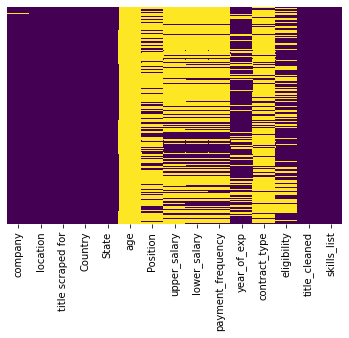

In [19]:
#Check for missing values in the data
sns.heatmap(cleaned_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#pip install skimpy

In [21]:
from skimpy import skim

skim(cleaned_df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 8700   │ │ object      │ 12    │                                    │
│ │ Number of columns │ 15     │ │ float64     │ 3     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missin ┃ complet ┃ mean   ┃ sd     ┃ p0 ┃ p25   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┃         ┃ g      ┃ e rate  ┃        ┃        ┃    ┃       ┃        ┃        ┃        ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ upper_s │   6300 │    0.28 │ 290000 │ 750000 │  8 │ 50000 │ 140000 │ 170000 │   █    │  │
│ │ alary   │        │         │        │        │    │       │        │     00 │        │  │
│ │ lower_s │   5900 │    0.33 │ 190000 │ 490000 │ 10 │ 35000 │ 120000 │ 110000 │   █    │  │
│ │ alary   │        │         │        │        │    │       │        │     00 │        │  │
│ │ year_of │   1900 │    0.78 │     13 │     37 │  0 │     3 │      7 │    350 │   █    │  │
│ │ _exp    │        │         │        │        │    │       │        │        │        │  │
│ └─────────┴────────┴─────────┴────────┴────────┴────┴───────┴────────┴────────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [22]:
cleaned_df['age'].unique()

array([nan, '35 or younger', '25 or older', '40 or older'], dtype=object)

In [23]:
cleaned_df['Position'].unique()

array(['Senior Level', nan, 'Mid-Level', 'Entry Level'], dtype=object)

In [24]:
cleaned_df['year_of_exp'].unique()

array([  5.,   4.,   3.,   2.,   8.,  15.,  nan,  10.,  14.,  12.,   7.,
         1.,   6.,  40.,  60., 200.,  75.,  30.,  20.,  13.,  50.,   9.,
        25., 350.,  11.,  35., 160., 155.,  18.,  17., 100.,  70.,  85.,
       180., 125., 175.,  80., 130., 150., 170.,  16., 122.,   0.,  45.,
        24., 329., 136.,  89.,  90.,  44., 145., 110.,  39., 124., 178.,
       250.,  26.,  19.,  99.])

In [25]:
cleaned_df['eligibility'].unique()

array([nan, 'undergraduate', 'hs', 'postgraduate', 'doctorate',
       'high school diploma'], dtype=object)

In [26]:
cleaned_df['contract_type'].unique()

array(['Full-time', None, 'Contract'], dtype=object)

In [27]:
cleaned_df['payment_frequency'].unique()

array([None, 'Monthly', 'Yearly', 'Hourly'], dtype=object)

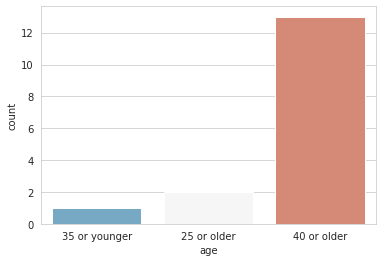

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='age',data=cleaned_df,palette='RdBu_r')

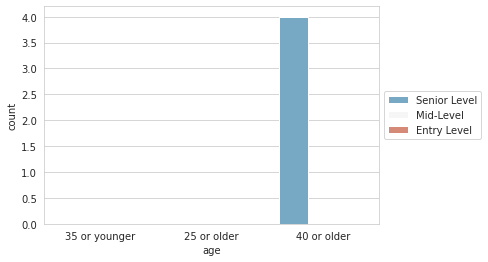

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='age',data=cleaned_df,palette='RdBu_r',hue = 'Position' )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

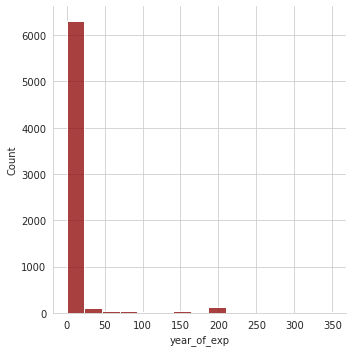

In [30]:
sns.displot(cleaned_df['year_of_exp'].dropna(),kde=False,color='darkred',bins=15)

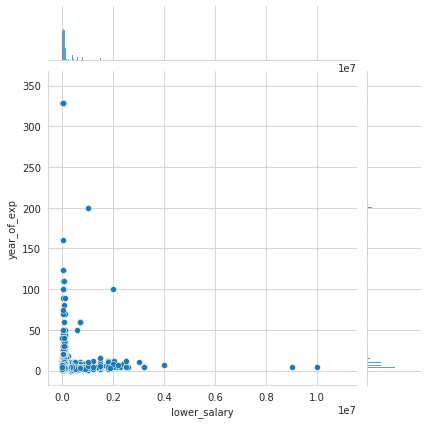

In [41]:
sns.jointplot(x='lower_salary',y='year_of_exp',data=cleaned_df,kind='scatter')

<Figure size 4320x720 with 0 Axes>

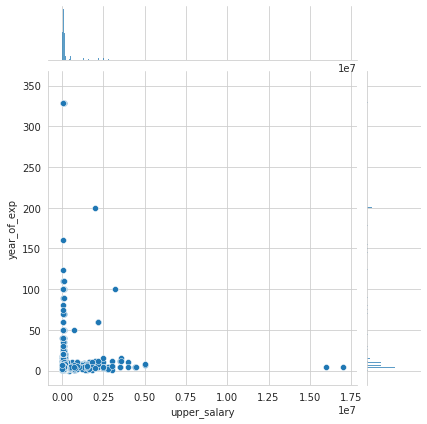

In [45]:
#plt.ticklabel_format(style='plain') 
plt.figure(figsize=(60,10))
sns.jointplot(x='upper_salary',y='year_of_exp',data=cleaned_df,kind='scatter')

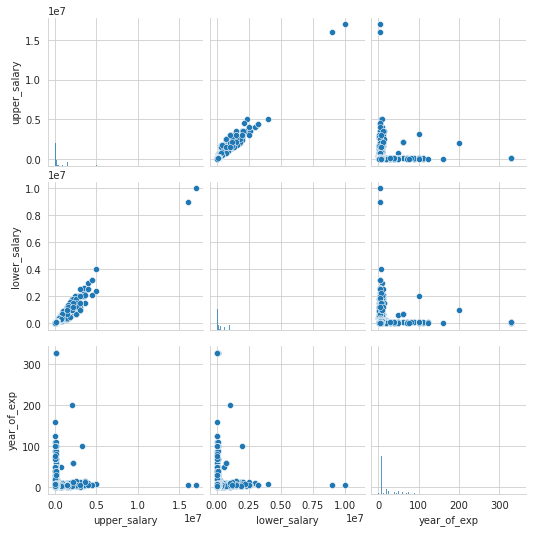

In [33]:
sns.pairplot(cleaned_df)

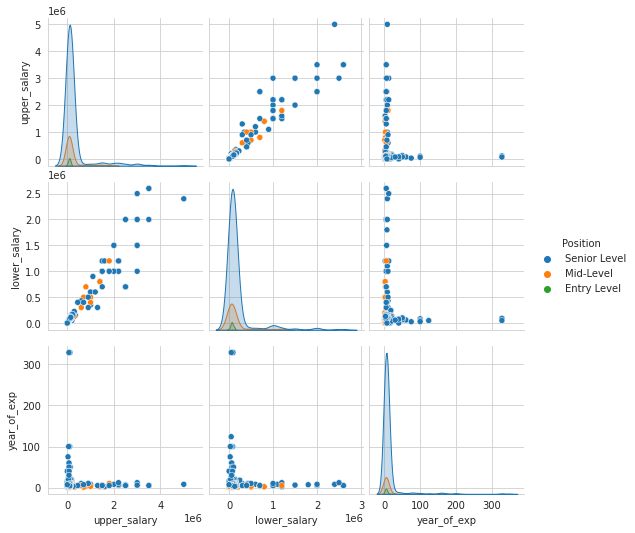

In [34]:
sns.pairplot(cleaned_df,hue ='Position')

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


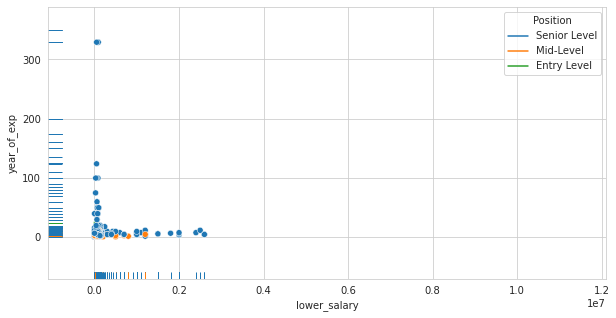

In [35]:
#with Multiple SCATTER PLOT
plt.figure(figsize=(10,5))
sns.scatterplot(data=cleaned_df, x ="lower_salary",y="year_of_exp",hue='Position')
sns.rugplot(data=cleaned_df, x ="lower_salary",y="year_of_exp",hue='Position')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


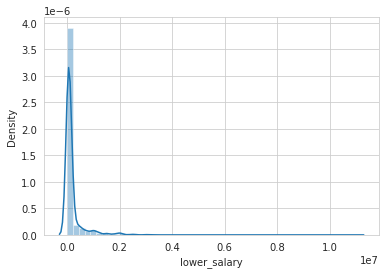

In [36]:
sns.distplot(cleaned_df['lower_salary'])

In [55]:
plt.figure(figsize=(15,8))
sns.distplot(cleaned_df['upper_salary'])
#plt = plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')


AttributeError: ignored